In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
import torch
import numpy as np

from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from dataset_utils import parse_annotation, modify_annotation
from augmenter import augmenter

## Dataset VOC2007
All 20 classes in data:

| Object Class | Object Class | Object Class | Object Class | Object Class |
| ------------ | ------------ | ------------ | ------------ | ------------ |
| Aeroplane    | Bicycle      | Bird         | Boat         | Bottle       |
| Bus          | Car          | Cat          | Chair        | Cow          |
| Dining table | Dog          | Horse        | Motorbike    | Person       |
| Potted plant | Sheep        | Sofa         | Train        | TV/monitor   |


| Object | Mapped To |
| --- | --- |
| cow | sheep, horse |
| sheep | cow, horse |
| horse | cow, sheep |
| bicycle | motorbike |
| motorbike | bicycle |
| cat | dog |
| car | bicycle |
| person | potted plant |
| bird | cat |

In [12]:
object_classes = [
    "bicycle", "aeroplane", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow",
    "dining table", "dog", "horse", "motorbike", "person",
    "potted plant", "sheep", "sofa", "train", "tvmonitor"]

In [187]:
data_path = '/home/jovyan/ddorin/generative_augmentation/augmenter_pipeline/VOC2007'
annotation_path = data_path + '/Annotations/000067.xml'
image_filename, anns = parse_annotation(annotation_path)
image_filename = image_filename.rsplit('.', 1)[0]

In [188]:
anns

{'aeroplane': [(<PIL.Image.Image image mode=L size=500x272>, 0)]}

In [189]:
image_filename

'000067'

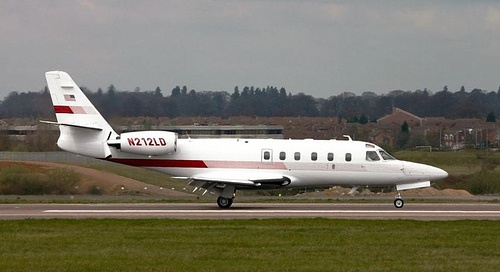

In [190]:
current_object = 'aeroplane'
mask, ind = anns[current_object][0]
image = Image.open(data_path + '/JPEGImages/' + image_filename +'.jpg')
image
#mask

## Creating an augmented dataset

### Pipeline for augmentation

In [21]:
model = augmenter()

Loading checkpoint shards: 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]
/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 3/3 [00:11<00:00,  3.84s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
vae/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:  14%|█▍        | 1/7 [00:01<00:07,  1.32s/it]An error occurred while trying to fetch /home/jovyan/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/.cache/huggingface/hub/models--runwayml

06/22 00:58:54 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
06/22 00:58:54 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


In [199]:
#object_classes
new_image, new_object, prompt = model.augment(pil_image=image,
                                                pil_mask=mask,
                                                current_object=current_object,
                                                new_objects_list=None,
                                                num_inference_steps=200,
                                                guidance_scale=5.2,
                                                return_prompt=True)

100%|██████████| 200/200 [00:06<00:00, 32.91it/s]


In [200]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: helicopter, prompt: a large vertical flying machine with two rotating blades on its top, smooth curved edges throughout its body, gleaming metal surfaces, and vivid colorful markings. Helicopter.



New object: chair, prompt: a sturdy, well-crafted seat with a comfortable backrest and smooth wooden legs forming a solid support system - chair



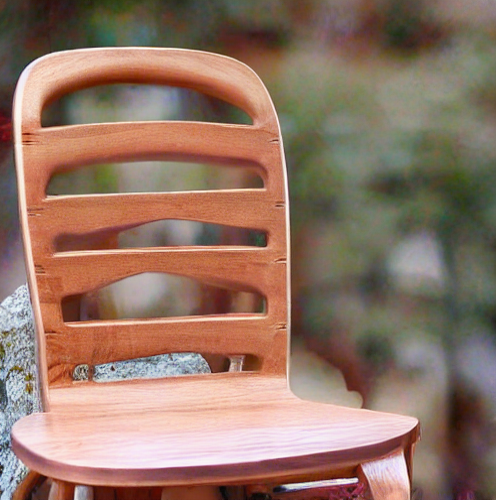

In [172]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [169]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: pottedplant, prompt: a lively, green-leaved, compact arrangement in a modest terracotta container



New object: pottedplant, prompt: a lively, green-hued arrangement in a round pot with a sturdy stem supporting multiple branches bearing vibrant leaves



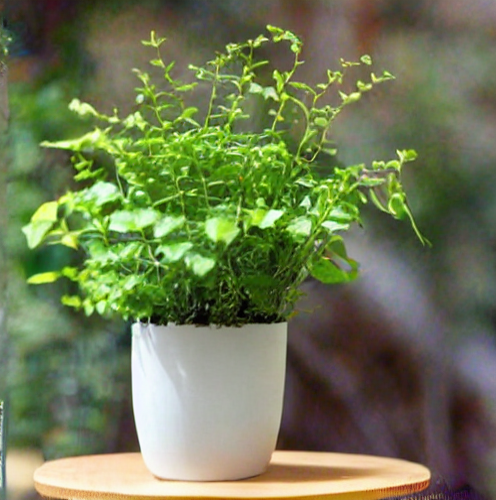

In [155]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: cat, prompt: a cat appears soft, warm-colored with gentle movements, fluffy tail, and alert, inquisitive eyes. Cat.



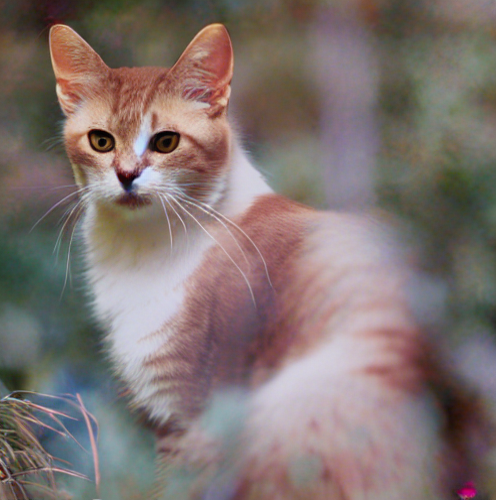

In [144]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: bird, prompt: a small, graceful creature with soft feathers in various colors, featuring long beak and slender legs - bird.



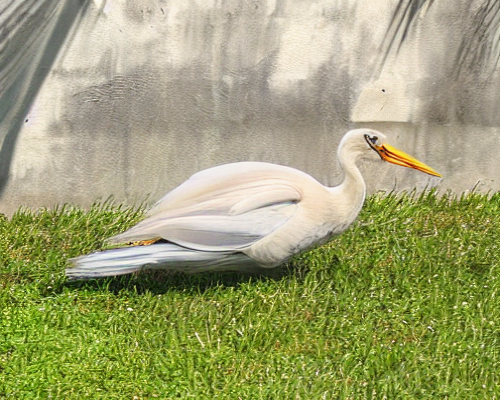

In [85]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: rabbit, prompt: a small fluffy creature with long curved ears and compact body featuring soft, delicate fur. Rabbit.



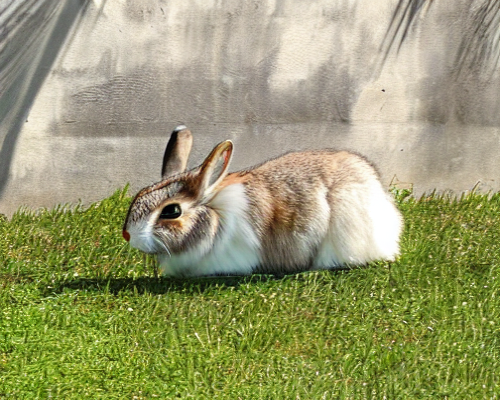

In [46]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a fox, prompt: a captivating creature with golden fur, piercing eyes, pointy ears, graceful tail, and slender body. Fox



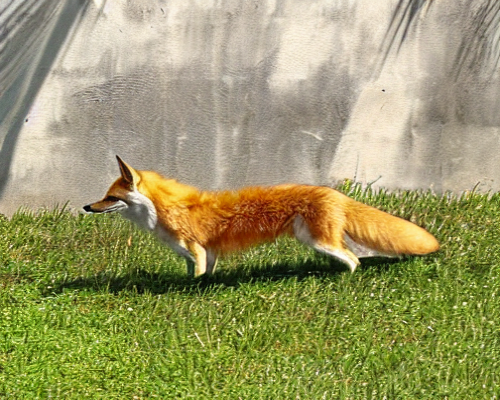

In [28]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [389]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a chair, prompt: a solid construction, featuring smooth wooden surfaces with subtle variations in color, sturdy legs, and a comfortable seat made from plush upholstery providing soft support; chair.



In [341]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: 'chair', prompt: a simple yet solid furniture piece with four legs connecting a horizontal seat and vertical backrest, creating a comfy resting area - chair



New object: a bus, prompt: a massive vehicle; large, lengthy body; colorful, eye-catching design; shiny windows with a reflection of its surroundings; wide doors allowing easy entry and exit. Bus.



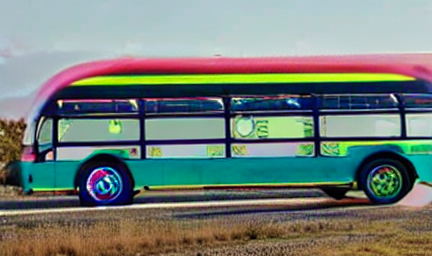

In [324]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [322]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: airplane, prompt: a streamlined, spacious, metallic, glossy airplane



New object: a cat, prompt: a graceful feline with a velvety fur coat, its agile body shaped by fluid curves, showcasing an elegant gait. Cat



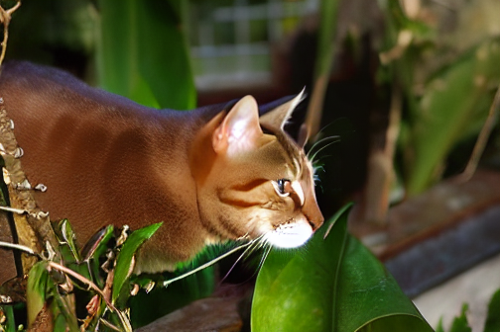

In [295]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a squirrel, prompt: a small, agile creature with a bushy tail covered in brown fur, having bright, curious eyes, appearing nimble and playful as it moves. Squirrel



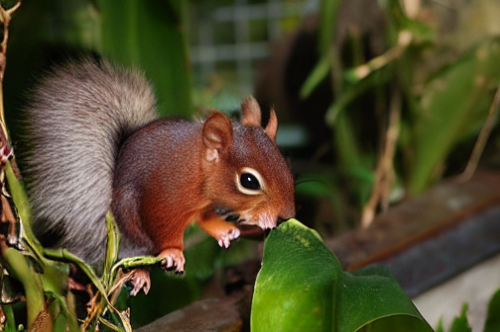

In [289]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a butterfly, prompt: a graceful, colorful creature with vibrant wings featuring numerous intricate patterns; it's also very delicate and has an enchanting presence - a butterfly.



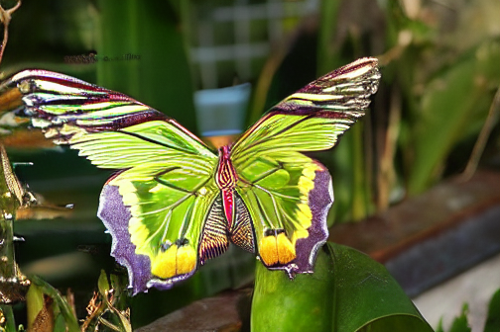

In [281]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [278]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a cat, prompt: a small, furry creature with pointed ears, big soulful eyes, and a graceful, slender body. Cat



New object: boat, prompt: a large vessel, sturdy and durable, having a flat base for floating, with a rounded hull, displaying graceful curves as it glides through water; boat.



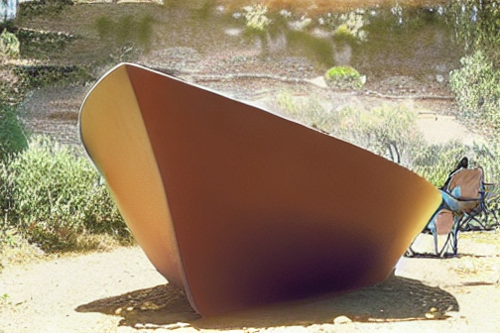

In [112]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a motorcycle, prompt: a compact, sleek machine with smooth curves, shiny surface, gleaming wheels, and powerful stance - motorcycle.



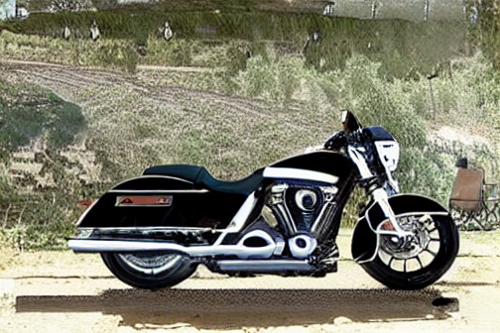

In [108]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [81]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a bicycle, prompt: a sturdy machine with two equal-sized wheels, metal frame holding handlebars, and pedals beneath for smooth movement; it's designed for effortless riding on diverse terrains. Bicycle.



New object: aeroplane, prompt: a sleek and long aircraft, characterized by its gleaming wings, streamlined fuselage, and prominent tail, flying high in the sky – aeroplane



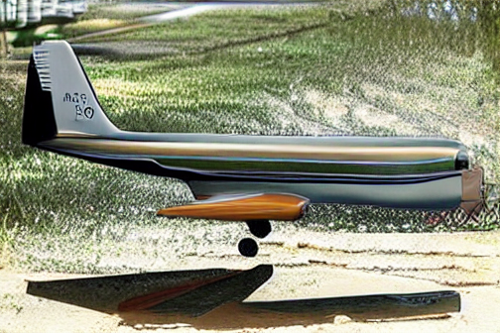

In [67]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: bus, prompt: a large, yellow transportation vehicle with several windows on its sides, doors at both ends, and numerous seats inside for people to sit comfortably while traveling. bus



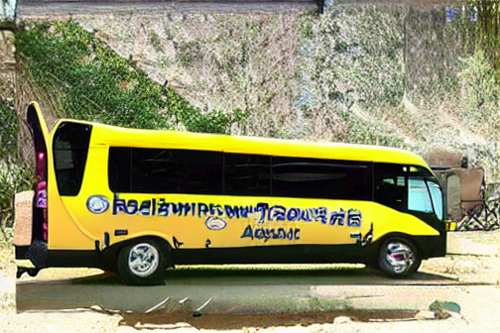

In [65]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

In [170]:
new_image.save('./VOC_demo/'+image_filename+'.jpg')

### Rewrite annotations

In [ ]:
for file_name in xml_files:
    with get_local_path(file_name) as local_path:
        raw_ann_info = ET.parse(local_path)

    object_detect = raw_ann_info.findall('object')[obj2remove]
    if object_detect.findall('name')[0].text in mapping:
        prompt = mapping[object_detect.findall('name')[0].text][0]
        negative_prompt = object_detect.findall('name')[0].text
        object_detect.findall('name')[0].text = prompt

        raw_ann_info.findall('filename')[0].text = f'replaced_{mask_dataset.files[i]}_{j}.xml'

        raw_ann_info.write(os.path.join(DATA_PATH, f'VOCdevkit/VOC2012/Annotations/replaced/replaced_{mask_dataset.files[i]}_{j}.xml'), encoding='utf8', xml_declaration=True)

        image = ToPILImage()(elem[0])
        mask_remove = ToPILImage()((elem[1] == (obj2remove + 1)).float()).filter(ImageFilter.MaxFilter(11))

        input_image = {'image': image, 'mask': mask_remove}
        size_image = image.size

        res = predict(
                pipe,
                input_image,
                prompt,
                fitting_degree,
                ddim_steps, scale,
                seed,
                negative_prompt,
                task,
                None,
                None
        )
        result = res[0][1].resize(size_image)
        result.save(os.path.join(DATA_PATH, f'VOCdevkit/VOC2012/JPEGImages/replaced/replaced_{mask_dataset.files[i]}_{j}.jpg'))